In [20]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
ama_cat_csv = Path("amazon_categories.csv")
ama_catDF= pd.read_csv(ama_cat_csv)
ama_prod_csv = Path("amazon_products.csv")
ama_prodDF= pd.read_csv("amazon_products.csv")


In [12]:
# Select only the relevant columns from ama_prodDF
ama_prod_selected = ama_prodDF[['title', 'price', 'category_id','boughtInLastMonth' ]]

# Perform the join
combined_amaDF = ama_catDF.merge(ama_prod_selected, on='category_id')


In [13]:
combined_amaDF.head()

,category_id,category_name,title,price,boughtInLastMonth
0,1,Beading & Jewelry Making,Duufin 120 Pieces Acrylic Keychain Blanks Set ...,9.99,50
1,1,Beading & Jewelry Making,"DIY Tray Silicone Resin Mold, Oval Epoxy Resin...",8.99,0
2,1,Beading & Jewelry Making,"GTOTd I Love Rock and Roll Pins Set(18 Pack,2....",12.79,50
3,1,Beading & Jewelry Making,Xuhal 100 Pack Plastic Ring Sizer Bulk Reusabl...,16.99,0
4,1,Beading & Jewelry Making,"Large Dice Resin Molds, 2 Styles Silicone Dice...",15.99,50


In [18]:
# Group by category_id
grouped_amaDF = combined_amaDF.groupby('category_id')

# Aggregate price by mean
agg_amaDF = grouped_amaDF.agg({'price': 'mean'})  

# Count the number of products per category
product_counts = grouped_amaDF['title'].count().reset_index(name='product_count')

# Group by category_id and include category_name in the summary
summary_ama = combined_amaDF.groupby('category_id').agg(
    category_name=('category_name', 'first'),  # Include category_name
    average_price=('price', 'mean'),          # Calculate average price
    total_price=('price', 'sum'),             # Calculate total price
    product_count=('title', 'count'),         # Count the number of products
    total_bought=('boughtInLastMonth', 'sum') # Total items bought in last month
).reset_index()

# Display the final summary
print(summary_ama)


     category_id                                    category_name  \
0              1                         Beading & Jewelry Making   
1              2                                Fabric Decorating   
2              3                      Knitting & Crochet Supplies   
3              4                             Printmaking Supplies   
4              5                 Scrapbooking & Stamping Supplies   
..           ...                                              ...   
243          262  Xbox Series X & S Consoles, Games & Accessories   
244          263                           PC Games & Accessories   
245          264                     Baby Girls' Clothing & Shoes   
246          265                            Boys' School Uniforms   
247          270                                     Toys & Games   

     average_price  total_price  product_count  total_bought  
0        15.615846    128768.27           8246       1099750  
1        28.357012     61789.93           217

In [19]:
summary_ama.head(5)

,category_id,category_name,average_price,total_price,product_count,total_bought
0,1,Beading & Jewelry Making,15.615846,128768.27,8246,1099750
1,2,Fabric Decorating,28.357012,61789.93,2179,67400
2,3,Knitting & Crochet Supplies,16.751799,140480.59,8386,262100
3,4,Printmaking Supplies,78.233504,448590.91,5734,145050
4,5,Scrapbooking & Stamping Supplies,15.387751,91264.75,5931,500500


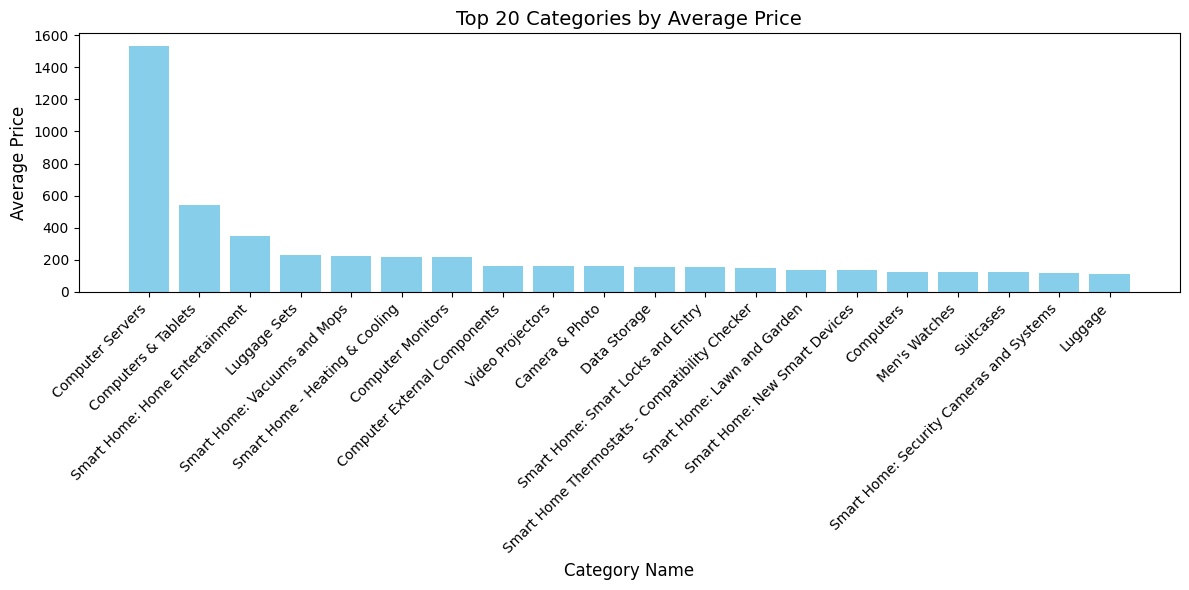

In [27]:
# Sort by average price and select top N categories
# Number of top categories to display
top_n = 20  # Adjust this to show more or fewer categories

# Sort by average price and select the top N categories
top_categories = summary.nlargest(top_n, 'average_price')

# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_categories['category_name'], top_categories['average_price'], color='skyblue')

# Adding labels and title
plt.xlabel('Category Name', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title(f'Top {top_n} Categories by Average Price', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()




In [28]:

# Calculate total sales per category (assuming 'total_price' is already calculated)
combined_amaDF['total_price'] = combined_amaDF['price'] * combined_amaDF['boughtInLastMonth']

# Group by category_id and calculate the total sales for each category
category_sales = combined_amaDF.groupby('category_id').agg(
    category_name=('category_name', 'first'),  # Get the category name
    total_sales=('total_price', 'sum')         # Sum total sales for each category
).reset_index()

# Step 2: Find the threshold for the top 10% of sales
sales_threshold = category_sales['total_sales'].quantile(0.9)

# Step 3: Filter out categories that fall within the top 10% of total sales
top_10_percent_categories = category_sales[category_sales['total_sales'] >= sales_threshold]

# Display the top 10% categories by total sales
print(top_10_percent_categories)


     category_id                   category_name  total_sales
16            17    Automotive Tools & Equipment   74697831.5
45            47              Hair Care Products  152940697.5
47            49              Skin Care Products  119996888.5
50            52          Personal Care Products   60497389.5
66            72              Office Electronics   95038114.0
104          116                Women's Clothing   67695103.0
112          126              Oral Care Products   61471957.5
116          130              Household Supplies   66198883.5
117          131            Health Care Products   68067197.5
121          135              Health & Household   93895499.0
122          136       Sports Nutrition Products   90938064.0
148          162         Industrial & Scientific  130196201.5
150          164                         Bedding   86802691.0
151          165             Home Décor Products   74805270.5
153          167     Household Cleaning Supplies  120567961.5
156     

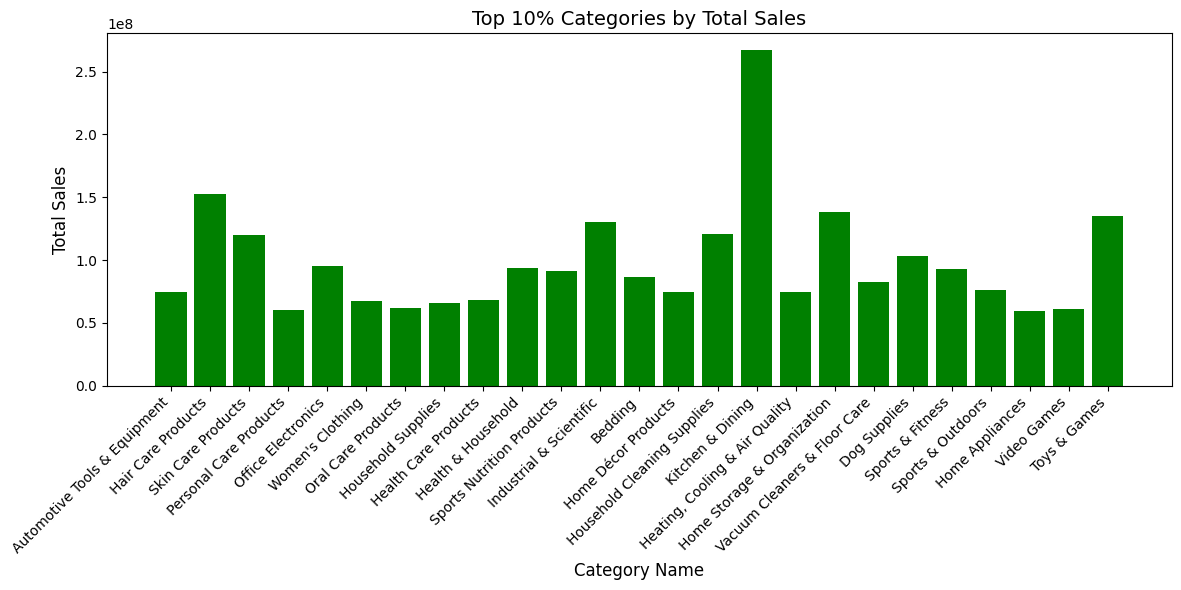

In [29]:

# Plotting the top 10% categories
plt.figure(figsize=(12, 6))
plt.bar(top_10_percent_categories['category_name'], top_10_percent_categories['total_sales'], color='green')

# Adding labels and title
plt.xlabel('Category Name', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Top 10% Categories by Total Sales', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [30]:
# Calculate total sales across all categories
total_sales_all_categories = category_sales['total_sales'].sum()

# Calculate the percentage of total sales for each category
category_sales['percentage_sales'] = (category_sales['total_sales'] / total_sales_all_categories) * 100

# Step 3: Find the categories that dominate the top 10% of total sales
sales_threshold = category_sales['total_sales'].quantile(0.9)
top_10_percent_categories = category_sales[category_sales['total_sales'] >= sales_threshold]

# Display the top 10% categories by percentage sales
print(top_10_percent_categories[['category_name', 'total_sales', 'percentage_sales']])


                      category_name  total_sales  percentage_sales
16     Automotive Tools & Equipment   74697831.5          1.606136
45               Hair Care Products  152940697.5          3.288497
47               Skin Care Products  119996888.5          2.580147
50           Personal Care Products   60497389.5          1.300802
66               Office Electronics   95038114.0          2.043489
104                Women's Clothing   67695103.0          1.455565
112              Oral Care Products   61471957.5          1.321757
116              Household Supplies   66198883.5          1.423394
117            Health Care Products   68067197.5          1.463566
121              Health & Household   93895499.0          2.018920
122       Sports Nutrition Products   90938064.0          1.955330
148         Industrial & Scientific  130196201.5          2.799450
150                         Bedding   86802691.0          1.866412
151             Home Décor Products   74805270.5          1.60

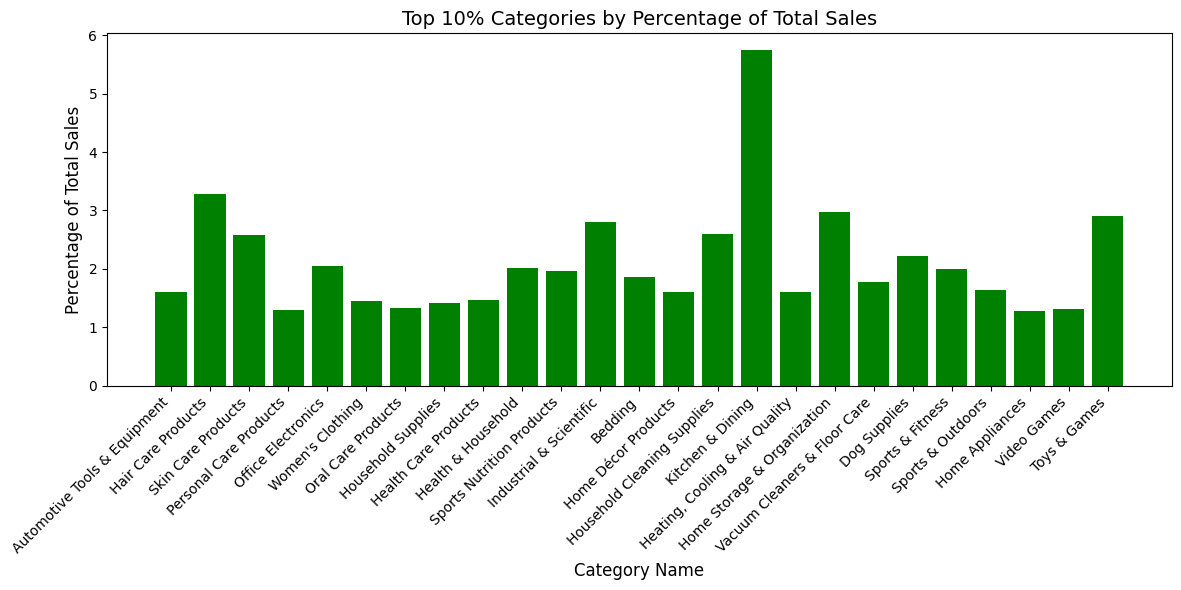

In [31]:
# Plotting the top 10% categories by percentage sales
plt.figure(figsize=(12, 6))
plt.bar(top_10_percent_categories['category_name'], top_10_percent_categories['percentage_sales'], color='green')

# Adding labels and title
plt.xlabel('Category Name', fontsize=12)
plt.ylabel('Percentage of Total Sales', fontsize=12)
plt.title('Top 10% Categories by Percentage of Total Sales', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
